<a href="https://colab.research.google.com/github/Shreyas6474/Assignmenk-week06/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import itertools

In [ ]:
df = pd.read_csv('/content/segmentation_data[1].csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


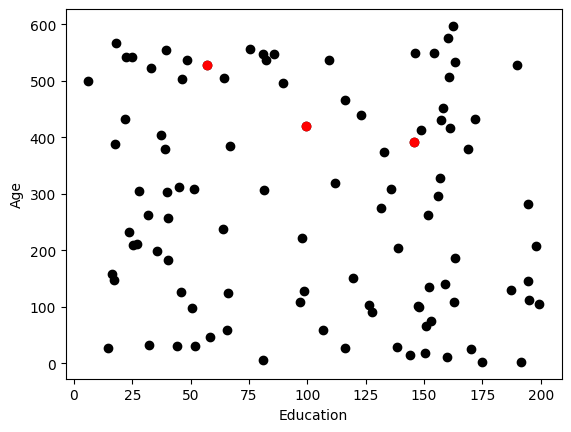

In [ ]:
K=3
X = pd.DataFrame({
    "Education": np.random.rand(100) * 200,
    "Age": np.random.rand(100) * 600,
})

Centroids = (X.sample(n=K))
plt.scatter(X["Education"],X["Age"],c='black')
plt.scatter(Centroids["Education"],Centroids["Age"],c='red')
plt.xlabel('Education')
plt.ylabel('Age')
plt.show()

In [ ]:
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,0.000000,-1.421085e-16,5.684342e-17,9.059420e-17,-5.684342e-17,1.563194e-16,2.842171e-17,0.000000
std,1.000250,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250
min,-1.731185,-9.173988e-01,-9.930243e-01,-1.528532e+00,-1.731068e+00,-2.234225e+00,-1.269525e+00,-0.909730
25%,-0.865592,-9.173988e-01,-9.930243e-01,-7.603825e-01,-6.337243e-02,-6.113281e-01,-1.269525e+00,-0.909730
50%,0.000000,-9.173988e-01,-9.930243e-01,-2.482829e-01,-6.337243e-02,-1.418903e-01,2.968230e-01,0.321298
75%,0.865592,1.090038e+00,1.007025e+00,5.198664e-01,-6.337243e-02,4.492952e-01,2.968230e-01,0.321298
max,1.731185,1.090038e+00,1.007025e+00,3.421764e+00,3.272018e+00,4.945225e+00,1.863171e+00,1.552326


In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

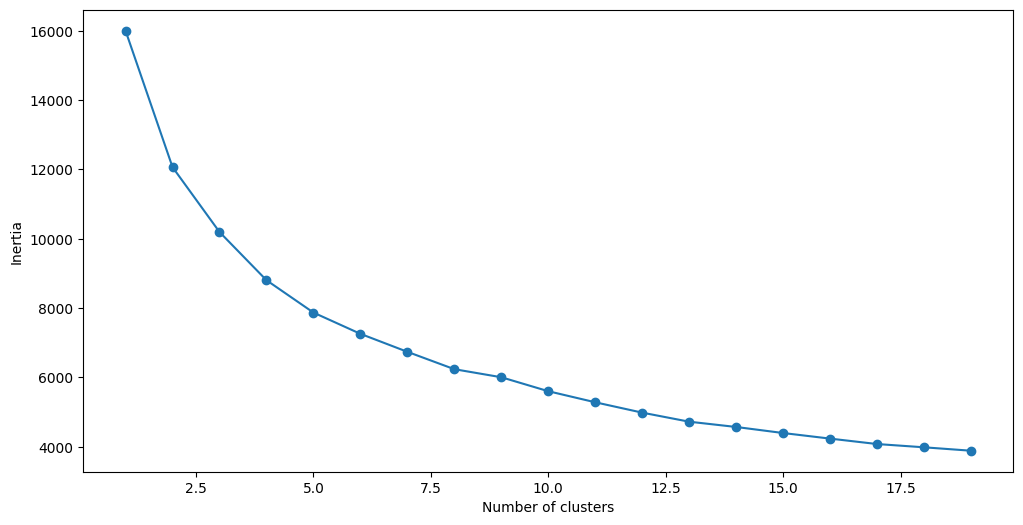

In [ ]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
frame = pd.DataFrame(df_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    553
4    472
1    406
3    313
0    256
Name: cluster, dtype: int64

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
np.random.seed(0)
X = np.random.rand(100, 2)
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 6.0355270719994145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X = df.drop(columns=["ID"])
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
inertia = kmeans.inertia_
print("Inertia:", inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 673036781440.1233


In [ ]:
from sklearn.metrics import pairwise_distances
import itertools


cluster_centers = kmeans.cluster_centers_
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')


intra_cluster_distances = []
labels = kmeans.labels_
for i in range(n_clusters):
    cluster_points = X[labels == i]
    distances = pairwise_distances(cluster_points, metric='euclidean')
    max_intra_distance = np.max(distances)
    intra_cluster_distances.append(max_intra_distance)


dunn_index = np.max(inter_cluster_distances) / np.max(intra_cluster_distances)
print("Dunn Index:", dunn_index)

Dunn Index: 3.8687022657257106


In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
inertias=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X,y)
  inertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

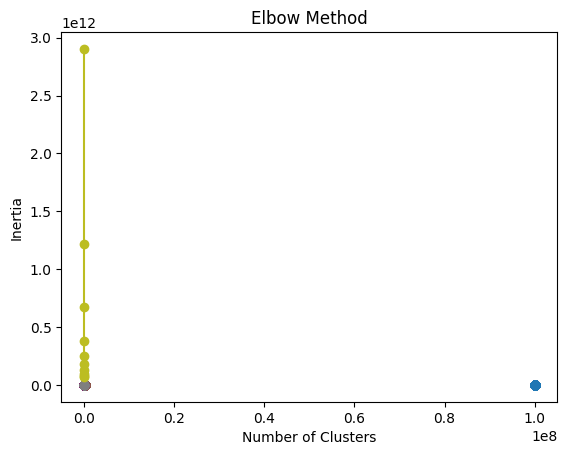

In [ ]:
plt.plot(X,y,inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Explained Variance Ratios: [0.36198848 0.1920749 ]


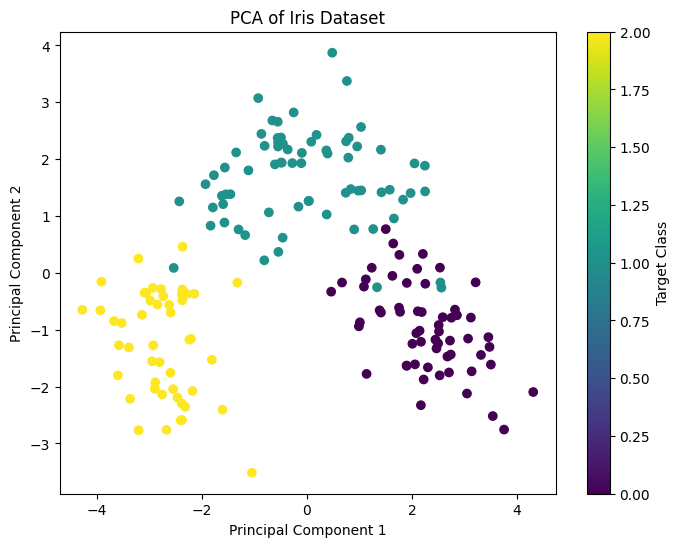

In [ ]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

data = load_wine()
X = data.data
y = data.target

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

n_components = 2
pca = PCA(n_components=n_components)

X_reduced = pca.fit_transform(X_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target Class')
plt.show()